### Homework 3 (Anjul Kumar Tyagi - 111482304, Sanaz Sheikhi - 111733554)
#### Task 1 (Scoring the houses based on desirability)
Build a scoring function to rank houses by “desirability”, presumably a notion related to cost or value.  Identify what the ten most desirable and least desirable houses in the Kaggle data set are, and write a one page description of which variables your function used and how well you think it worked.


In [1]:
import pandas as pd
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning

For Desirability, we chose four features that according to us, affect the desirability of the house. These features are:

- Land Tax Value: Land Tax Value justifies how good/bad the area of situated house is. The **more** the land tax, **more** valuable the land is, and hence, **more desirable** house.
- Structure Tax Value: The tax on the house shows how valuable that house is. So, in our desirability matrix, **more** the structure tax, **more desirable** the house.
- Tax Amount: **Higher** the tax, lower is it's desirability.
- Year built: **Newer** the house, more it's desirable.

For all the above features, the rank of the features for their importance is: **Land Tax Value > Structure Tax Value > Tax Amount > Year Built.**

Given this ranking we've weighted the features and computed the sum in our scoring function.

We will start by fetching the features from the properties file.

In [38]:
colnames = ['parcelid','landtaxvaluedollarcnt','structuretaxvaluedollarcnt','taxamount','yearbuilt']
col_new = ['landtaxvaluedollarcnt','structuretaxvaluedollarcnt','taxamount','yearbuilt']
desire = pd.read_csv('data/properties_2017.csv', usecols=colnames)
desire_normal = pd.read_csv('data/properties_2017.csv', usecols=colnames)

Dropping the rows with Nan values

In [42]:
desire = desire.dropna(axis=0, how='any')
desire_normal = desire_normal.dropna(axis=0, how='any')

**Scoring Function:** Our scoring function is given by the equation:
**Score = SUM(Weight_feature*Feature_value)**

Because we're adding the feature values, we need to normalize them before we can use them in our scoring function.

In [17]:
from sklearn.preprocessing import MinMaxScaler
min_max_scalar = MinMaxScaler()

In [44]:
desire_normal[col_new] = min_max_scalar.fit_transform(desire_normal[col_new])

After Normalizing the data, we can use our scoring function to store the values in other column named **score**. We'll put weights in one vector and calculate the scores for each Parcel in the **desire dataframe.**

In [18]:
weights = pd.DataFrame(pd.Series([0.5, 0.3, -0.2, 0.1],index=col_new, name=0))
weights

,0
landtaxvaluedollarcnt,0.5
structuretaxvaluedollarcnt,0.3
taxamount,-0.2
yearbuilt,0.1


Run the scoring function to generate the scores for each tuple.

In [47]:
desire_normal['score'] = desire_normal[col_new].dot(weights)

After the scoring is done, we'll replace the normalized values with the original values and then print the first 10 and last 10 most desirable houses from the list.

In [50]:
desire = pd.merge(desire_normal[['parcelid','score']], desire, on='parcelid', how='left')
desire = desire.sort_values(['score'], ascending=False)
desire.head(10)

,parcelid,score,yearbuilt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
1279592,11641900,0.544823,2002.0,10355346.0,77665102.0,1052070.50
1217346,11984395,0.484157,2014.0,222334475.0,48670130.0,3277055.20
578433,11641913,0.459575,2001.0,7248742.0,63167616.0,841059.04
2178096,11645223,0.413071,1938.0,24469437.0,58726658.0,994030.96
1424571,11641911,0.406556,1970.0,3045750.0,56808872.0,715242.96
333154,11746970,0.403184,2013.0,255321161.0,31777325.0,3458861.12
2873199,11656332,0.365957,2014.0,27168090.0,43899410.0,824166.91
2597688,11639856,0.353353,1937.0,6466241.0,49733753.0,651677.87
1714692,11645106,0.339961,1927.0,109038.0,48952198.0,586639.30
859214,11642362,0.334065,1950.0,4568625.0,45686250.0,600616.63


#### Analysis of Top 10 Most desirable houses
As it's clear from the top 10 most desirable houses list, the most desirable house has the **Highest Land tax value** among all other houses, this means that this house is located at a very good location compared to other houses. Also, some of the houses are very recently built which can be seen by the parameter **year built.**

However, there are some old houses such as the ones built in **1937 and 1927** but because of their location in a posh area, they are more desirable than other houses.

Tax Amount also plays a role in deciding the top 10 houses as it can be seen that all of these houses have a decent tax amount compared to their location.

In [51]:
desire.tail(10)

,parcelid,score,yearbuilt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
1353114,11911525,0.004201,1801.0,471167.0,707269.0,15682.27
1033481,11765988,0.003606,1808.0,131562.0,50710.0,2277.20
1840632,12560874,0.003466,1806.0,54382.0,202031.0,3883.01
64742,12360654,0.003396,1808.0,10950.0,29799.0,1122.88
1486147,12554225,0.003072,1807.0,19685.0,48184.0,909.47
1414893,12879853,0.002841,1805.0,108225.0,164500.0,3562.94
2454028,11911158,0.001580,1801.0,129353.0,272611.0,5658.76
1949519,12450176,0.001008,1802.0,142812.0,84387.0,2921.83
1411093,11912309,0.000305,1801.0,139.0,55894.0,955.98
2086918,11638291,-0.022991,1955.0,2284475.0,745604.0,1765815.87


#### Analysis of the last 10 houses.

One thing common to all these houses is that they're very old houses and not in good locations i.e. **land tax value and the year built is low.** Also, these buildings are not well and hence they have **low structure tax value**.

#### Task 2: 
Define a house “pairwise distance function”, which measures the similarity of two properties.  Like a distance metric, similar pairs of very similar properties should be distance near zero, with distance increasing as the properties grow more dissimilar.  Experiment with your distance function, and write a one page discussion evaluating how well you think it worked.   Your function should include geographic as well as property-specific variables.

##### Distance Function: Weighted Eucledian Distance
We've decided to calculate the distance between two properties based on **Important features which affect the logerror.** So, suppose we've top **k** features which affect the prediction of logerror the most, we'll use these features to calculate and cluster the houses based on **how well they can predict the logerror.** 

Assuming we've the weights of these **k** features, we can use these weights in our distance function. So, **nearer the houses, closer they're in predicting the logerror.**

##### The task of feature selection (Experimenting with the Distance Function)
For finding the features which affect the logerror the most, we'll run **Feature Selection** methods like **Lasso, Linear Regression and Random Forest** to predict the top 10 features which can effectively predict the logerror.


We will start off by reading the data files. This time, we read all the features from the data file.

In [3]:
# Read the training and the properties files
train_2016 = pd.read_csv('data/train_2016_v2.csv')

In [4]:
properties_2016 = pd.read_csv('data/properties_2016.csv')

In [5]:
train_2017 = pd.read_csv('data/train_2017.csv')

In [6]:
properties_2017 = pd.read_csv('data/properties_2017.csv')

We create a variable of column names to pass to above functions.

In [11]:
 colnames = ['airconditioningtypeid','architecturalstyletypeid','basementsqft',
             'bathroomcnt','bedroomcnt','buildingqualitytypeid','buildingclasstypeid',
             'calculatedbathnbr','decktypeid','threequarterbathnbr','finishedfloor1squarefeet',
             'calculatedfinishedsquarefeet','finishedsquarefeet6','finishedsquarefeet12',
             'finishedsquarefeet13','finishedsquarefeet15','finishedsquarefeet50',
             'fireplacecnt','fireplaceflag','fullbathcnt','garagecarcnt','garagetotalsqft',
             'hashottuborspa','heatingorsystemtypeid','lotsizesquarefeet',
             'numberofstories','poolcnt','poolsizesum','pooltypeid10','pooltypeid2',
             'pooltypeid7','regionidcounty','regionidcity','regionidzip',
             'regionidneighborhood','roomcnt','storytypeid','typeconstructiontypeid',
             'unitcnt','yardbuildingsqft17','yardbuildingsqft26','yearbuilt','taxvaluedollarcnt',
             'structuretaxvaluedollarcnt','landtaxvaluedollarcnt','taxamount','assessmentyear']

##### Reducing the size of the dataframes
Because these data frames are too large, we can try to reduce the data frame size so that we can free up some space in the RAM. [Source: https://www.kaggle.com/zakuka/dataframe-memory-use-reduction

In [7]:
'''
get_min_memory_type find the minimum data type that can store all the data in a column and
assigns that data type to that column instead of Float_64.

'''
def get_min_memory_type(colobj, verbose=0):
    orig_type = colobj.dtype
    new_types = ["uint8", "int8", "uint16", "int16", 'float16', "uint32", "int32", 'float32']
    if (orig_type not in new_types and orig_type not in ["int64", "uint64", "float64"]):
        if (verbose > 0):
            print("Type {} of column {} is unsupported".format(orig_type, colobj.name))
        return orig_type

    for new_type in new_types:
        yes_min = colobj.min() == colobj.min().astype(new_type).astype(orig_type)
        yes_max = colobj.max() == colobj.max().astype(new_type).astype(orig_type)
        if (yes_min and yes_max):
            return new_type

    if (verbose > 0):
        print("No optimisation found for {} column of {} type".format(colobj.name, orig_type))
    return orig_type


Now we can go through all the columns of the data set and assign them the minimum data type that can accomodate all the data in that column without loosing data.

In [9]:
'''
reduce_mem_usage goes through all the columns of the dataset and assigns each column the minimum data
type possible. 
exclude -> the columns to exclude from the data frame
verbose -> whether or not to print the data while minimizing
'''

def reduce_mem_usage(df, exclude=[], verbose=0):
    start_mem_usg = df.memory_usage().sum() / 1024 ** 2
    if (verbose > 0):
        print("Memory usage before :", start_mem_usg, " MB")

    for colname in df.columns:
        if (colname not in exclude):
            colobj = getattr(df, colname)
            new_type = get_min_memory_type(colobj, verbose)
            if (new_type != colobj.dtype):
                if (verbose > 0):
                    print("Converting {} column from {} to {}".format(colname, colobj.dtype, new_type))
                df[colname] = df[colname].astype(new_type)

    end_mem_usg = df.memory_usage().sum() / 1024 ** 2

    if (verbose > 0):
        print("Memory usage after :", end_mem_usg, " MB")

    mem_usg_diff_prc = float((end_mem_usg - start_mem_usg)) * 100 / start_mem_usg

    if (verbose > 0):
        if (end_mem_usg < start_mem_usg):
            print("Memory gain: {0:0.2f}%".format(-mem_usg_diff_prc))
        else:
            print("Memory loss: {0:0.2f}%".format(mem_usg_diff_prc))

    return -mem_usg_diff_prc

The above functions can work for only the dataframes without Nan's. So we write the function to replace the Nan's with the means.
##### Replacing the Nan's with Means
We prefer replacing the Nan's with the means because while normalizing the data, the values with means become **zero.** Hence, they don't contribute in training and we can train our model only on real data values.

In [9]:
def fillna_mean(df, cols):
    for col in cols:
        mean_values = df[[col]].mean(axis=0)
        df[col].fillna(mean_values[col], inplace=True)

Now we should replace the Nan's in our data with the means so that we can reduce the size of the dataframes.

In [12]:
fillna_mean(properties_2016, colnames)
fillna_mean(properties_2017, colnames)

After replacing the Nan's with the mean of each column, we're all set to reduce the size of the dataframe.
We go through each column and find what is the minimum data type that can accomodate all the data in that column.
After deciding upon the minimum data type, we assign that column that data type.
The output of the **reduce_mem_usage** shows by what percent the size has been reduced for the dataframe.

In [13]:
reduce_mem_usage(properties_2016[colnames],[],0)

69.946803525306038

In [14]:
reduce_mem_usage(properties_2017[colnames],[],0)

69.946803525306038

After reducing the size of the dataframes, we can continue with the Feature selection task. 
Because the Kaggle data now includes the properties from **2016** and from **2017,** so we've decided to create four files combining the logerrors and the properties i.e.

- Properties of 2016 combined with the logerrors of 2017
- Properties of 2016 combined with the logerrors of 2016
- Properties of 2017 combined with the logerrors of 2017
- Properties of 2017 combined with the logerrors of 2016

In [15]:
prop16_train16 = pd.merge(train_2016,properties_2016, on='parcelid', how='left')
prop16_train17 = pd.merge(train_2017,properties_2016, on='parcelid', how='left')
prop17_train16 = pd.merge(train_2016,properties_2017, on='parcelid', how='left')
prop17_train17 = pd.merge(train_2017,properties_2017, on='parcelid', how='left')

After combining the data, we should normalize the dataframes. For this part, we can take note of the fields which are not **id type fields.** We don't normalize the 'id' type fields.

In [16]:
fields = ['basementsqft','bathroomcnt','bedroomcnt','calculatedbathnbr','threequarterbathnbr',
          'finishedfloor1squarefeet','calculatedfinishedsquarefeet','finishedsquarefeet6',
          'finishedsquarefeet12','finishedsquarefeet13','finishedsquarefeet15','finishedsquarefeet50',
          'fireplacecnt','fullbathcnt','garagecarcnt','garagetotalsqft','lotsizesquarefeet',
          'numberofstories','poolcnt','poolsizesum','roomcnt','unitcnt','yardbuildingsqft17',
          'yardbuildingsqft26','taxvaluedollarcnt','structuretaxvaluedollarcnt','landtaxvaluedollarcnt',
          'taxamount']

Now we can normalize the dataframes.

In [19]:
prop16_train16[fields] = min_max_scalar.fit_transform(prop16_train16[fields])

In [20]:
prop16_train17[fields] = min_max_scalar.fit_transform(prop16_train17[fields])

In [21]:
prop17_train16[fields] = min_max_scalar.fit_transform(prop17_train16[fields])

In [22]:
prop17_train17[fields] = min_max_scalar.fit_transform(prop17_train17[fields])

##### Seperating the training and testing files
For seperating the training and testing parts from the files, we've used **10 percent** of the rows from each of the four created training datasets for testing. 

In [33]:
test1 = prop16_train16.iloc[0:9000]
test2 = prop16_train17.iloc[7000:14000]
test3 = prop17_train16.iloc[18000:27000]
test4 = prop17_train17.iloc[21000:28000]

Dropping the testing portion from the trainin datasets.

In [34]:
train1 = prop16_train16.drop(prop16_train16.index[0:9000])
train2 = prop16_train17.drop(prop16_train17.index[7000:14000])
train3 = prop17_train16.drop(prop17_train16.index[18000:27000])
train4 = prop17_train17.drop(prop17_train17.index[21000:28000])

Before perming the feature selection algorithms, we've to filter our dataframes to only contain numbers. 
Hence, we should drop the fields that contain objects or not useful data for training.

In [35]:
drop_cols = ['parcelid', 'transactiondate', 'propertyzoningdesc', 
             'propertycountylandusecode','taxdelinquencyflag','taxdelinquencyyear',
             'censustractandblock']

In [147]:
x_train1 = train1.drop(drop_cols, axis=1)
x_train2 = train2.drop(drop_cols, axis=1)
x_train3 = train3.drop(drop_cols, axis=1)
x_train4 = train4.drop(drop_cols, axis=1)

Preparing the data for training. Converting the dataframes to numpy matrices dropping the rows that contain Nan values.

In [27]:
x_train1 = x_train1.dropna(axis=0, how='any')
x_train2 = x_train2.dropna(axis=0, how='any')
x_train3 = x_train3.dropna(axis=0, how='any')
x_train4 = x_train4.dropna(axis=0, how='any')

Seperating the features from logerrors.

In [28]:
Y1 = x_train1['logerror'].values
Y2 = x_train2['logerror'].values
Y3 = x_train3['logerror'].values
Y4 = x_train4['logerror'].values

In [29]:
x_train1 = x_train1.drop(['logerror'], axis=1)
x_train2 = x_train2.drop(['logerror'], axis=1)
x_train3 = x_train3.drop(['logerror'], axis=1)
x_train4 = x_train4.drop(['logerror'], axis=1)

**X1, X2, X3, X4** are the four matrices we will use for feature selection. Similarly, **Y1, Y2, Y3, Y4** are the corresponding logerror values.

In [30]:
X1 = x_train1.as_matrix()
X2 = x_train2.as_matrix()
X3 = x_train3.as_matrix()
X4 = x_train4.as_matrix()

Creating a features of columns to rank

In [31]:
colnames = x_train1.columns

Now we define a **Ranks** dictionary that'll computer the average score of all the features generated from all the feature selection algorithms it goes through. We can use this ranking function to computer the ranking based on the scores generated by the Feature selection algorithms.

In [32]:
ranks = {}
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

After we've filtered the data, we're now ready to pass the data through the feature selection models. First we use **Linear regression for feature selection.** Linear regression recursively goes through all the features one by one and gives weight to that feature. After we've weights for each feature, we get a ranking of the features based on how effective they are in predicting the Logerror.

In [22]:
import numpy as np
from sklearn.linear_model import LinearRegression

Find the Linear regression prediction for all the four training files.

In [36]:
# Using Linear Regression
lr = LinearRegression()
lr.fit(X1,Y1)
ranks["LinReg1"] = ranking(np.abs(lr.coef_), colnames)
lr.fit(X2,Y2)
ranks["LinReg2"] = ranking(np.abs(lr.coef_), colnames)
lr.fit(X3,Y3)
ranks["LinReg3"] = ranking(np.abs(lr.coef_), colnames)
lr.fit(X4,Y4)
ranks["LinReg4"] = ranking(np.abs(lr.coef_), colnames)

After we've the ranking from Linear Regression, we apply another feature selection algorithm: **The Ridge Regression.** The ridge regression works for the cases when there is multicollinearity between the features.

In [38]:
from sklearn.linear_model import Ridge

In [39]:
# Using Ridge 
ridge = Ridge(alpha = 7)
ridge.fit(X1,Y1)
ranks['Ridge1'] = ranking(np.abs(ridge.coef_), colnames)
ridge.fit(X2,Y2)
ranks['Ridge2'] = ranking(np.abs(ridge.coef_), colnames)
ridge.fit(X3,Y3)
ranks['Ridge3'] = ranking(np.abs(ridge.coef_), colnames)
ridge.fit(X4,Y4)
ranks['Ridge4'] = ranking(np.abs(ridge.coef_), colnames)

After Computing the ranking for all the features, we create an empty dictionary and use it to store the average ranking for each feature.

In [43]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                              for method in ranks.keys()]), 2)

methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")

Now we'll put all the ranking values into a pandas dataframe and sort it to find the top 10 best features to predict the logerror.

In [44]:
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])
# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

In [46]:
meanplot.head(10)

,Feature,Mean Ranking
26,taxvaluedollarcnt,0.47
44,landtaxvaluedollarcnt,0.42
25,structuretaxvaluedollarcnt,0.34
48,finishedsquarefeet12,0.31
36,taxamount,0.29
49,regionidcounty,0.25
3,calculatedfinishedsquarefeet,0.21
34,lotsizesquarefeet,0.19
30,yearbuilt,0.17
4,regionidzip,0.13


So here are the top 10 features which help the most in predicting the logerrors. Most features are related to tax values. So, now we'll only work with these features combined with **latitudes and longitudes** for the further work.

In [219]:
cols_prop = ['taxvaluedollarcnt','landtaxvaluedollarcnt','structuretaxvaluedollarcnt','finishedsquarefeet12',
              'taxamount','calculatedfinishedsquarefeet','lotsizesquarefeet','bathroomcnt','latitude',
             'longitude','parcelid']

We will also store the **weights** for these features to calculate the **Distance Vector Matrix.** For simplicity, we assume the weight of each factor to be the **average ranking** for that vector generated by feature prediction models.

In [220]:
weights = [0.47,0.42,0.35,0.31,0.29,0.21,0.19,0.12,0.08,0.08]

Because now we've only a particular columns to read, we can read the properties files and train files with only the given columns.

In [221]:
prop_2016 = pd.read_csv('data/properties_2016.csv', usecols=cols_prop)

In [222]:
prop_2017 = pd.read_csv('data/properties_2017.csv', usecols=cols_prop)

In [223]:
train_2016 = pd.read_csv('data/train_2016_v2.csv', usecols=['logerror', 'parcelid'])

In [224]:
train_2017 = pd.read_csv('data/train_2017.csv', usecols=['logerror', 'parcelid'])

Filling the Nan's with the means.

In [225]:
fillna_mean(prop_2016, cols_prop)
fillna_mean(prop_2017, cols_prop)

Now we've to merge the logerros with the above data.

In [226]:
cols_prop.append('logerror')

Just like in the Feature Selection part, we will have total 4 combinations of training and properties data when we include 2016 and 2017 data.

In [227]:
prop16_train16 = pd.merge(train_2016,prop_2016, on='parcelid', how='left')
prop16_train17 = pd.merge(train_2017,prop_2016, on='parcelid', how='left')
prop17_train16 = pd.merge(train_2016,prop_2017, on='parcelid', how='left')
prop17_train17 = pd.merge(train_2017,prop_2017, on='parcelid', how='left')

Normalizing the data before working on the distance matrix.

In [228]:
from sklearn.preprocessing import MinMaxScaler
min_max_scalar = MinMaxScaler()
prop16_train16[cols_prop] = min_max_scalar.fit_transform(prop16_train16[cols_prop])
prop16_train17[cols_prop] = min_max_scalar.fit_transform(prop16_train17[cols_prop])
prop17_train16[cols_prop] = min_max_scalar.fit_transform(prop17_train16[cols_prop])
prop17_train17[cols_prop] = min_max_scalar.fit_transform(prop17_train17[cols_prop])

As we've our data ready, before working on the distance matrix, we can seperate the training and testing data.

In [229]:
test1 = prop16_train16.iloc[9000:18000]
test2 = prop16_train17.iloc[7000:14000]
test3 = prop17_train16.iloc[18000:27000]
test4 = prop17_train17.iloc[21000:28000]

In [230]:
train1 = prop16_train16.drop(prop16_train16.index[9000:18000])
train2 = prop16_train17.drop(prop16_train17.index[7000:14000])
train3 = prop17_train16.drop(prop17_train16.index[18000:27000])
train4 = prop17_train17.drop(prop17_train17.index[21000:28000])

We've removed **10 percent** data from training set to create the testing set. Now we can drop the remaining Nan values.

In [231]:
x_train1 = train1.drop('parcelid', axis=1)
x_train2 = train2.drop('parcelid', axis=1)
x_train3 = train3.drop('parcelid', axis=1)
x_train4 = train4.drop('parcelid', axis=1)

In [232]:
x_train1 = x_train1.dropna(axis=0, how='any')
x_train2 = x_train2.dropna(axis=0, how='any')
x_train3 = x_train3.dropna(axis=0, how='any')
x_train4 = x_train4.dropna(axis=0, how='any')

Now, we can seperate the training and testing portions of the files and store them as matrices.

In [233]:
Y1 = x_train1['logerror'].values
Y2 = x_train2['logerror'].values
Y3 = x_train3['logerror'].values
Y4 = x_train4['logerror'].values

In [234]:
X1 = x_train1.drop(['logerror'], axis=1).as_matrix()
X2 = x_train2.drop(['logerror'], axis=1).as_matrix()
X3 = x_train3.drop(['logerror'], axis=1).as_matrix()
X4 = x_train4.drop(['logerror'], axis=1).as_matrix()

For simplicity, because now the data we've isn't very large, we can combine all the four training and testing set into one matrix for **X and Y.**

In [235]:
import numpy as np
X = np.concatenate((X1,X2,X3,X4), axis=0)
Y = np.concatenate((Y1,Y2,Y3,Y4), axis=0)

##### Function to calculate the pairwise distance
For calculating the pairwise distance, we are using weighted Eucledian Function to calculate the distance between the features pointed by the Feature selection methods.

The Formula for calculating the pairwise distance is given by: 
Assuming we've two features **A and B** with weights $W_1$ and $W_2$ and we're calculating pairwise distance between points **1 and 2.**

$dist = \sqrt{W_1(1_A-2_A)^2 + W_2(1_B-2_B)^2}$

In [60]:
from sklearn.neighbors import DistanceMetric
dist = DistanceMetric.get_metric('wminkowski',p=2,w=weights)
Dist_matrix = dist.pairwise(X[0:500,:])

##### Evaluating the Distance Function
For Evaluation, we will find out the pairs of houses with minimum distance between them and analyze their properties.
We can find the indices of 5 least occuring and highest occuring values in the Distance Matrix as

In [61]:
def nlargest_indices(arr, n):
    uniques = np.unique(arr)
    threshold = uniques[-n]
    return np.where(arr >= threshold)

def nlowest_indices(arr, n):
    uniques = np.unique(arr)
    threshold = uniques[-n]
    return np.where(arr <= threshold)

In [62]:
xlow, ylow = nlowest_indices(Dist_matrix, 5)
xhigh, yhigh = nlargest_indices(Dist_matrix, 5)

After obtaining the indices of the highest and lowest values in the Distance Matrix, we find the indices of the lowest and highest occuring values as:

[xLow, yLow] = [**(0,1)**,(0,2),(499,497)]

[xHigh, yHigh] = [**(112,136)**,(136,253),(136,478)]

Now we'll analyze the values shown in bold above in the section below.

**We will start off by analysing the lowest seperated houses** on the distance matrix.

##### Comparing the properties with id **0 and 1** with values shows below.
As seen from the above values, all the properties such as **taxamount, land tax value** are very close to each other and hence the houses are similar in predicting the logerror values.What is important that these houses **are not** situated close to each other, as it can be seen by their latitudes and longitudes but because the weights for latitudes and longitudes are very small, hence these houses are similar in types. This is a proof that the **Distance function** is working correctly based on the weights.

In [95]:
x_train1.iloc[0]

logerror                        0.495890
bathroomcnt                     0.100000
calculatedfinishedsquarefeet    0.073970
finishedsquarefeet12            0.084054
latitude                        0.637696
longitude                       0.506793
lotsizesquarefeet               0.001056
structuretaxvaluedollarcnt      0.012330
taxvaluedollarcnt               0.012978
landtaxvaluedollarcnt           0.009690
taxamount                       0.020774
Name: 0, dtype: float64

In [96]:
x_train1.iloc[1]

logerror                        0.474909
bathroomcnt                     0.175000
calculatedfinishedsquarefeet    0.099433
finishedsquarefeet12            0.112988
latitude                        0.222673
longitude                       0.935216
lotsizesquarefeet               0.000499
structuretaxvaluedollarcnt      0.034817
taxvaluedollarcnt               0.021099
landtaxvaluedollarcnt           0.009757
taxamount                       0.031390
Name: 1, dtype: float64

##### Analysis of houses with high distance between them i.e. with id's 112 and 136
Shown above are the values for and example of houses which are not similar in predicting the logerror. As it can be seen from the below values, there is a big difference in the values of **land tax value, tax value, finished square feet and calculated finished square feet.** Note that the above values are normalized, and hence the difference might not seem that large but actually it is large. The features listed above have high weights and hence the houses are seperated. This also prooves that the **Distance Matrix is a correct function** of houses based on the ability to predict the logerrors.

In [99]:
x_train1.iloc[112]

logerror                        0.498159
bathroomcnt                     0.150000
calculatedfinishedsquarefeet    0.093804
finishedsquarefeet12            0.106591
latitude                        0.068883
longitude                       0.975263
lotsizesquarefeet               0.000622
structuretaxvaluedollarcnt      0.017613
taxvaluedollarcnt               0.026125
landtaxvaluedollarcnt           0.022435
taxamount                       0.023050
Name: 112, dtype: float64

In [100]:
x_train1.iloc[136]

logerror                        0.497442
bathroomcnt                     0.125000
calculatedfinishedsquarefeet    0.074542
finishedsquarefeet12            0.084703
latitude                        0.749767
longitude                       0.103978
lotsizesquarefeet               0.001741
structuretaxvaluedollarcnt      0.022809
taxvaluedollarcnt               0.023423
landtaxvaluedollarcnt           0.017264
taxamount                       0.024230
Name: 136, dtype: float64

#### Task 3: 
Using your distance function and an appropriate clustering algorithm, cluster the houses using your distance function into 10 to 100 classes, as you see best.   Present a dot-plot/map (with tiny dots colored to reflect the clustering) illustrating the clusters your method produced.    Write a one page discussion/analysis of what your clusters seem to be capturing, and how well they work.

For this part, we'll use the same **Distance function** as used in task 2 and generate clusters using the **DBSCAN** library in python.

We start off by defining our Distance function below.

In [102]:
from sklearn.cluster import DBSCAN
def dist_func(v1,v2):
    return np.sqrt(np.sum(weights*(v1-v2)**2))

After we've definined the **distance function**, we can compute the clusters using the code below.

In [103]:
db = DBSCAN(min_samples=20, eps=0.01, metric=dist_func).fit(X[0:10000,:])

DBSCAN also suggests what is the **best possible number of clusters** from given data. To know the best possible clusters, use the command:

In [124]:
Xtemp = x_train1.iloc[0:100000]
n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
n_clusters_

11

So, now we know that the sufficient number of clusters for our data is **11** clusters. Now we'll use this information to plot the clusters with lattitudes and longitudes using **K-Means** clustering algorithm.

Training the data on K-Means and Plotting the clusters

In [128]:
import numpy as np
from sklearn.cluster import KMeans
km = KMeans(n_clusters=11)
cluster = km.fit_predict(Xtemp)

We will now plot the cluster with **lattitudes and longitudes** on the X and the Y axis to see how the location affect the clustering. However, because the weights of lattitudes and longitudes in our model were not significant, we don't expect the clusters to be properly seperated based on locations.

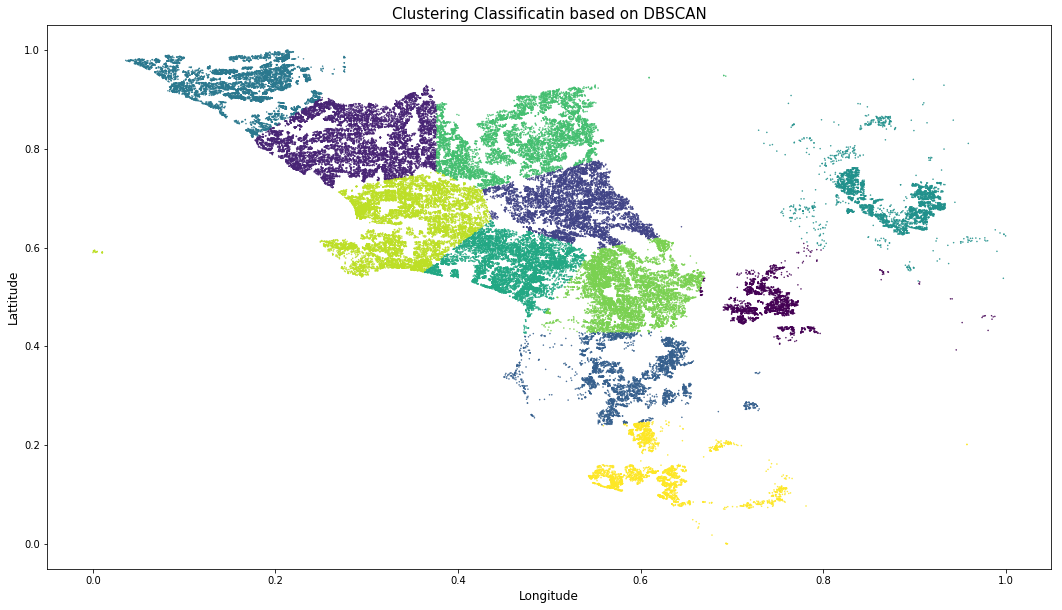

In [132]:
import matplotlib.pyplot as plt
labels = kmeans.labels_
fig = plt.figure()
fig.set_size_inches(18,10)
plt.scatter(f1,f2,c=labels, marker='.',s=1)
plt.title('Clustering Classificatin based on DBSCAN', fontsize=15)
plt.ylabel('Lattitude',fontsize=12)
plt.xlabel('Longitude',fontsize=12)
plt.show()

##### Discussion and Analysis of the clustering algorithm
First we decided to run DBSCAN to evaluate what is the best number of clusters for the given dataset. We got the result to be **11 clusters** which can significantly represent the dataset.

Looking at the clusters, we've plotted the clusters with Latitudes and Longitudes so that we can clearly evaluate the how the clusters of houses are distributed based on their location. Note that our predicting function was **predicting the logerror** and clusters based on prediction of logerror that are now shows based on how location affect the predictin of logerrors. 

It can be seen that location **does** affect the prediction of logerros when taken into count. Houses are clubbed into small clusters of same color show that they have the same or close prediction power for the logerror based on the features that we've got by **feature selection.**

Even though latitude and longitude didn't have high weights during feature selection, they do affect the prediction of logerrors, as it is clear from the clustering. However, there are certain discrete areas where the clusters aren't very clear, it shows that latitudes and longitudes aren't good at predicting logerros in those areas.

Also, considering that we plotted 11 clusters, only a few of them are dense and dominant. This is a sign that not all clusters are very much dependent on location of the houses. This point makes sense and is coherent with the feature selection results that we got which showed that latitudes and longitudes don't contribute much towards predicting the logerrors.

#### Task 4: Including an external dataset with the model.
Identify at least one external data set which you can integrate into your price prediction analysis to make it better.  Perhaps it can be financial, such as the historical effects of interest rates, consumer confidence, etc. on housing prices.  Perhaps it can be geographic, like the crime rate, educational scores, income levels, etc. Write a one page discussion/analysis on whether this data helps with the prediction tasks.


For the external dataset, we've decided to include the **Crime data in Los Angeles** along with the original properties data to see if the model improves it's performance or not.

Link to the crime data: https://catalog.data.gov/dataset/crime-data-from-2010-to-present

In [134]:
crime = pd.read_csv('data/crime.csv', usecols=['Location '])

We will be **geo_crime** library to map the latitudes and longitudes from the Crime data to the Kaggle data. For that, we first need to seperate the **Latitudes and Longitudes** from the **Location** field of the original data.

In [135]:
geo_crime = crime['Location '].str.strip('()').str.split(', ', expand=True).rename(columns={0:'Latitude', 1:'Longitude'})
geo_crime.columns = ['Latitude','Longitude']
geo_crime = geo_crime.apply(pd.to_numeric)
geo_crime = geo_crime.dropna()

For simplicity, to combine the crime data to the original data, we'll be dividing the data in form of blocks. Dividing the latitudes and longitudes in **100 Blocks each** will give us **10,000** blocks of locations.
For each block of location, we will calculate the mean crime value of the block and store it in a dataframe.
After we've assigned each block a crime value, then we'll map the parcelid's from the Kaggle data to the respective blocks that they lie in and assign that property, the respective crime value.

In [136]:
lat_max = geo_crime.loc[geo_crime['Latitude'].idxmax()]['Latitude']
lat_min = geo_crime.loc[geo_crime['Latitude'].idxmin()]['Latitude']
lon_max = geo_crime.loc[geo_crime['Longitude'].idxmax()]['Longitude']
lon_min = geo_crime.loc[geo_crime['Longitude'].idxmin()]['Longitude']

Now we divide the latitudes and longitudes range into blocks. 

In [137]:
offset_lat = (lat_max - lat_min) / 100
offset_lon = (lon_max - lon_min) / 100
Blocks = pd.DataFrame(columns=['latitude_start','latitude_end','longitude_start','longitude_end','rate'])

In [138]:
lat = pd.DataFrame({'A': np.linspace(lat_min, lat_max, 100)})
lon = pd.DataFrame({'B': np.linspace(lon_min, lon_max, 100)})
lat.columns = ['lat']
lon.columns = ['lon']
rate = np.zeros((100,100))

In the previous step, we create a matrix named **rate** that stores the mean crime rate for each block of location. To fill the step matrix, we use the code below.

In [144]:
for index, row in geo_crime.iterrows():
    a = row['Latitude']
    b = row['Longitude']
    for i in range(1,100):
        if lat.loc[i-1,'lat'] <= a and a <= lat.loc[i,'lat']:
            for j in range(1,100):
                if lon.loc[j-1,'lon'] <= b and b <= lon.loc[j,'lon']:
                    rate[i,j] = rate[i,j]  + 1
                    break

After we've initialized the **rate matrix** with the mean crime rates, we create a seperate field in the original Kaggle dataset named **rate** which stores the rate of crime for that parcel.

In [145]:
prop_2016['rate'] = 0
prop_2017['rate'] = 0
# Dividing the latitudes and longitudes so that they are in the same format as the crime data.
prop_2016['latitude'] = prop_2016['latitude'] / 1000000
prop_2017['longitude'] = prop_2017['longitude'] / 1000000

After the **rate matrix** has the mean value of crimes in each area, we can map the parcels location to one of these blocks and assign it a crime rate which is equal to the crime value in that block. The code below is how we assign each parcel in our data, the mean value of crime in that area.

In [146]:
count = 0
for index, row in prop_2016.iterrows():
    a = row['latitude']
    b = row['longitude']
    for i in range(1,10):
        if lat.loc[i-1,'lat'] < a and a < lat.loc[i,'lat']:
            for j in range(1,10):
                if lon.loc[j-1,'lon'] < b and b < lon.loc[j,'lon']:
                    row['rate'] = rate[i,j]
                    count = count + 1
                    break

Let's view our new data frame with included information about the crime data.

In [156]:
prop_2016[['parcelid','latitude','longitude','rate']].head()

,parcelid,latitude,longitude,rate
0,10754147,34144442.0,-118654084.0,11
1,10759547,34140430.0,-118625364.0,11
2,10843547,33989359.0,-118394633.0,18
3,10859147,34148863.0,-118437206.0,81
4,10879947,34194168.0,-118385816.0,79


Similarly for properties of 2017

In [157]:
prop_2017[['parcelid','latitude','longitude','rate']].head()

,parcelid,latitude,longitude,rate
0,10754147,34144442.0,-118654084.0,54
1,10759547,34140430.0,-118625364.0,31
2,10843547,33989359.0,-118394633.0,45
3,10859147,34148863.0,-118437206.0,18
4,10879947,34194168.0,-118385816.0,19


##### Analysis of addition of the crime data to the dataset
For evaluation, we will use linear regression on the new dataset and compare it to the results of the Linear regression without including the crime data.

In [162]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

Performing Linear Regression on original data **without the crime data**.

In [163]:
regr = linear_model.LinearRegression()
regr.fit(X,Y)

In [165]:
# Concatenating the test matrix to One
TestY = np.concatenate((test1['logerror'],test2['logerror'],test3['logerror'],test4['logerror']))
TestX = np.concatenate((test1.drop('logerror',axis=1),test2.drop('logerror',axis=1),
                        test3.drop('logerror',axis=1),test4).drop('logerror',axis=1), axis=0)

In [166]:
predict_y = regr.predict(TestX)

The result for the data **not** including crime data.

In [164]:
print(mean_squared_error(TestY, predict_y))
print(r2_score(TestY, predict_y))

0.0246944107389
0.00398665852805


Now that we've the score of the data without crime data, let's try to run **Linear Regression** on the data by including the crime data.
To include the crime data, we first need to add a column to the X and the Y matrix. Repeating steps for normalization and matrix formation, we the data for crime in the matrices **X_crime** and testing data in **TestX_crime**.

In [167]:
regr.fit(X_crime, Y)
predict_y = regr.predict(TestX_crime)
print(mean_squared_error(TestY, predict_y))
print(r2_score(TestY, predict_y))

0.0245493147902
0.00992894127855


##### Evaluation Results:
It can be seen that after including the crime data, the $r^2$ value increased but there was only a slight decrease in the **mean squared error.** The increase in the $r^2$ value shows that the quality of the model has increased with increase in the prediction power for the logerror.

Hence, the insertion of crime data, even though not that significantly helpful, has somewhat increased the prediction power of the model.

#### Task 5: Generate a predicting model and evaluate the results by submitting to Kaggle
Build the best prediction model you can to solve the Zillow task.  Use any data, ideas, and approach that you like. Predict the logerror for instances at file “sample_submission.csv”.  Report the score/rank you get.

For this part, we'll use **Gradient Descent** algorithm to predict the data, which should perform better than simple linear regression. 

Gradient Descent works gradually towards decreasing the **mean absolute error** and goes until the mean absolute error starts increasing. It then reports the final parameters for the **lowest mean squared error**.

For implementing the gradient descent, we'll use the **XGBoost** library in python.

In [168]:
import xgboost as xgb

Creating the Matrix in the specified format for evaluation and training.

In [171]:
XDB = xgb.DMatrix(X, label=Y)

Creating the evaluation matrix which is same as the original matrix.

In [172]:
evals = [(XDB,'train'),(XDB,'valid')]

Now we will set the parameters for gradient descent in a function.

In [173]:
def build_model():
    global xgb_params
    xgb_params = {
        'eta': 0.007,
        'max_depth': 6, 
        'subsample': 0.6,
        'objective': 'reg:linear',
        'eval_metric': 'mae',
        'lambda': 9.0,
        'alpha': 0.8,
        'colsample_bytree': 0.7,
        'silent': 1
    }

In [174]:
build_model()

After all the parameters are set, we can train our model using the following command.

In [175]:
xgb_clf = xgb.train(xgb_params, XDB, num_boost_round=10000, evals=evals, early_stopping_rounds=100)

After training, we can evaluate our model my predicting the logerror for the testing dataset. First, we'll prepare the training dataset.

In [179]:
Y1 = test1['logerror'].values
Y2 = test2['logerror'].values
Y3 = test3['logerror'].values
Y4 = test4['logerror'].values
Xtest1 = test1.drop(['logerror','parcelid'], axis=1).as_matrix()
Xtest2 = test2.drop(['logerror','parcelid'], axis=1).as_matrix()
Xtest3 = test3.drop(['logerror','parcelid'], axis=1).as_matrix()
Xtest4 = test4.drop(['logerror','parcelid'], axis=1).as_matrix()

In [181]:
Xtest = np.concatenate((Xtest1,Xtest2,Xtest3,Xtest4), axis=0)
Xtest = xgb.DMatrix(Xtest)
pred = xgb_clf.predict(Xtest)

Time to evaluate the model, we'll find out what is the mean squared error and $r^2$ value for our trained model.

In [182]:
Y = np.concatenate((Y1,Y2,Y3,Y4), axis=0)
print(mean_squared_error(Y,pred))
print(r2_score(Y,pred))

0.000315051479454
0.299846967747


The $r^2$ has greatly increased from the last **linear regression** results, which is a sign that the model has good predicting power. Below are the **Kaggle submission** results:

 - Submission 1 **(Support Vector Regression)** zestimate = 0.1131807
 - Submission 2 **(Gradient Descent)** zestimate = 0.0656324

#### Task 6 Permutation test
For permutation testing, we will use python's **permutation_test_score** library included in **sklearn.** Permutation testing is done on the predicted values by permuting the original test values in random order. 

In [209]:
from sklearn.model_selection import permutation_test_score
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold

Initializing the models to pass into the permutation function.

In [210]:
svr = SVR()
cv = StratifiedKFold(2)

In [247]:
score, permutation_scores, pvalue = permutation_test_score(
    svr, X[0:10000,:], Y[0:10000], cv=cv, n_permutations=100, n_jobs=1, verbose=1)

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   24.2s finished


In [248]:
print("Classification score %s (pvalue : %s)" % (score, pvalue))

Classification score -1.87045091487 (pvalue : 0.029702970297)


The small P value shows that the prediction model actually works and is not a fluke.

Now we'll plot the permutations and the actual scoring function to show how it's seperated from the random permutations.

In [244]:
n_classes = np.unique(Y).size

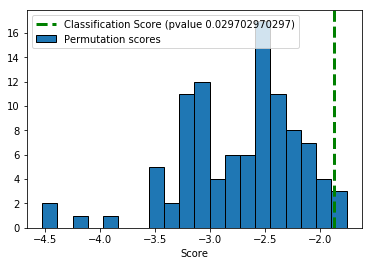

In [243]:
plt.hist(permutation_scores, 20, label='Permutation scores',
         edgecolor='black')
ylim = plt.ylim()
# BUG: vlines(..., linestyle='--') fails on older versions of matplotlib
# plt.vlines(score, ylim[0], ylim[1], linestyle='--',
#          color='g', linewidth=3, label='Classification Score'
#          ' (pvalue %s)' % pvalue)
# plt.vlines(1.0 / n_classes, ylim[0], ylim[1], linestyle='--',
#          color='k', linewidth=3, label='Luck')
plt.plot(2 * [score], ylim, '--g', linewidth=3,
         label='Classification Score'
         ' (pvalue %s)' % pvalue)
plt.ylim(ylim)
plt.legend()
plt.xlabel('Score')
plt.show()

##### Analysis
For large number of permutation i.e. 100, the prediction by the model come close to the mean of the random predictions for the small portion of the dataset.

As we increase the size of the dataset, the P value decreases, showing that for a large dataset, P value actually becomes very small.

**Permutations > 100** for a **50,000** row dataset produce the model as good as the real dataset with a low P value of around 0.0099.